In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
from pathlib import Path
import os

data_dir = Path('./data/')
data_path = Path('./data/fashion_mnist.npz')

if data_path.is_file():
    print('Data found. Loading...')
    data = np.load(data_path)
    X_train, Y_train, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
else:
    print('Data not found. Downloading...')
    if not data_dir.is_dir():
        os.mkdir(data_dir)
    from keras.datasets import fashion_mnist
    (X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
    X_train, X_test = X_train/255., X_test/255.
    np.savez_compressed(data_path, X_train, Y_train, X_test, Y_test)

Data found. Loading...


In [3]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
CLASS_LABELS = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

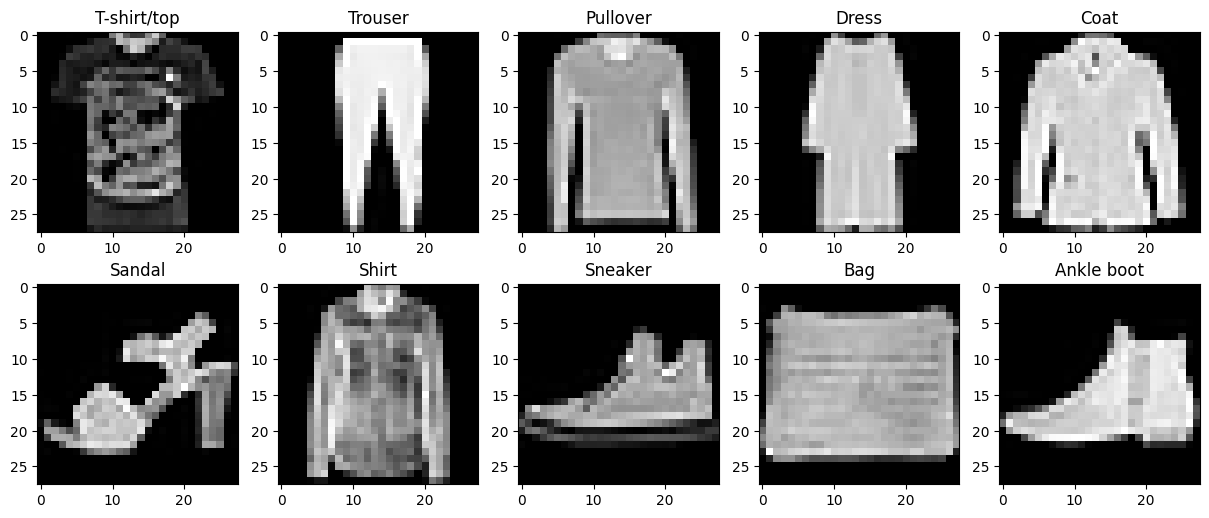

In [5]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    row_no = i//5
    col_no = i%5
    X_sub = X_train[Y_train==i]
    index = np.random.choice(a=range(len(X_sub)), size=1)
    ax[row_no][col_no].imshow(X_sub[index].reshape((28, 28)), cmap='gray')
    ax[row_no][col_no].set_title(CLASS_LABELS[i])

## Trying model on data

In [6]:
from activations import *
from losses import *
from metrics import *
from nn import *
from optimizers import *
from learn import *

In [11]:
model = FeedForwardNeuralNetwork(4, 128, activation='relu', weight_init='xavier')
optimizer = RMSProp(model)
loss_fn = CrossEntropyLoss()
metric = categorical_accuracy

In [12]:
history = fit(
    model,
    X_train[:50000].reshape(-1, 784),
    Y_train[:50000],
    X_train[50000:].reshape(-1, 784),
    Y_train[50000:],
    optimizer,
    loss_fn,
    metric,
    batch_size=128
)

[Epoch 1/10] train loss: 0.679319, val loss:  0.470764 || train score: 0.752705, val score: 0.834400
[Epoch 2/10] train loss: 0.483462, val loss:  0.485061 || train score: 0.833700, val score: 0.825500
[Epoch 3/10] train loss: 0.443607, val loss:  0.455638 || train score: 0.848186, val score: 0.834600
[Epoch 4/10] train loss: 0.426198, val loss:  0.491738 || train score: 0.853589, val score: 0.847500
[Epoch 5/10] train loss: 0.417696, val loss:  0.536354 || train score: 0.859551, val score: 0.839500
[Epoch 6/10] train loss: 0.416402, val loss:  0.538182 || train score: 0.861853, val score: 0.858600
[Epoch 7/10] train loss: 0.413576, val loss:  0.529159 || train score: 0.866544, val score: 0.851900
[Epoch 8/10] train loss: 0.408277, val loss:  0.769379 || train score: 0.866288, val score: 0.820800
[Epoch 9/10] train loss: 0.401916, val loss:  0.521039 || train score: 0.868494, val score: 0.840400
[Epoch 10/10] train loss: 0.400388, val loss:  0.540088 || train score: 0.870372, val score

In [13]:
metric(Y_test, predict(model, X_test.reshape(-1, 784)))

0.8441

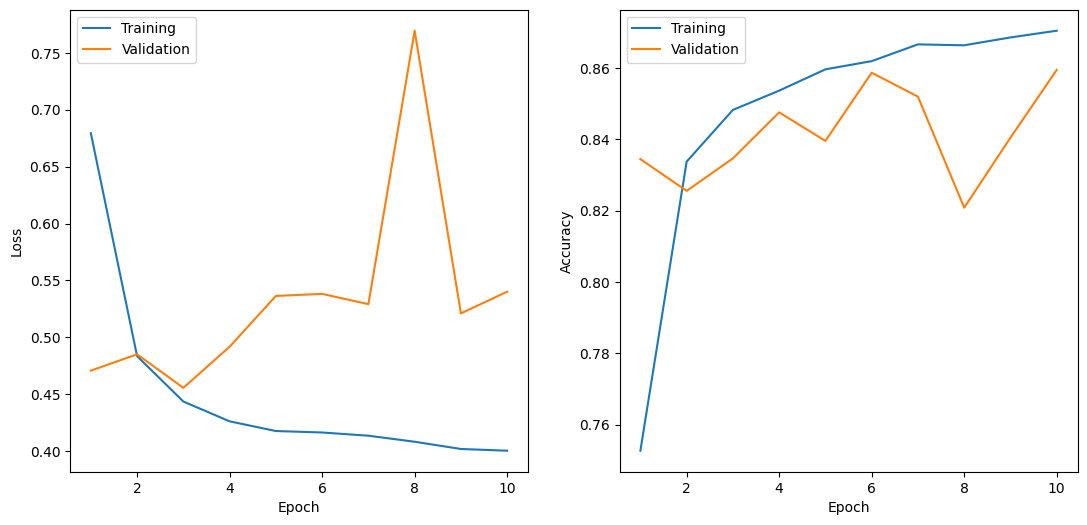

In [14]:
plt.figure(figsize=(13, 6))

plt.subplot(121)
plt.plot(history['epoch'], history['train_loss'], label='Training')
plt.plot(history['epoch'], history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history['epoch'], history['train_score'], label='Training')
plt.plot(history['epoch'], history['val_score'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()